# Data Exploration
Download and explore the stocks data from Yahoo finance api

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline

In [37]:
# Define the instruments to download.
tickers = ['TSLA']

# Define which online source one should use
data_source = 'yahoo'

# Download the data between start_date and end_date
start_date = '2016-01-01'
end_date = '2017-09-30'

# User pandas_reader.data.DataReader to load the desired data. 
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [38]:
df = panel_data.to_frame()
df = df.sort_index(ascending=True)

In [39]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,441.000000,441.000000,441.000000,441.000000,441.000000,4.410000e+02
mean,252.700385,252.700385,256.542381,248.737846,252.845918,5.377715e+06
std,60.120320,60.120320,60.607241,59.490839,60.261009,2.866793e+06
min,143.669998,143.669998,154.970001,141.050003,142.320007,1.659500e+06
25%,205.399994,205.399994,209.470001,202.500000,206.399994,3.516700e+06
50%,229.729996,229.729996,232.000000,225.580002,229.339996,4.662900e+06
75%,307.190002,307.190002,310.730011,303.480011,307.440002,6.451900e+06
max,385.000000,385.000000,389.609985,379.350006,386.690002,2.374240e+07


In [40]:
# Drop 'Close' in favor or Adj Close
df.drop('Close', axis=1, inplace=True)

In [35]:
df.head()

,,Adj Close,High,Low,Volume,Open
Date,minor,,,,,
2015-12-31,TSLA,240.009995,243.449997,238.369995,2715000.0,238.509995
2016-01-04,TSLA,223.410004,231.380005,219.000000,6827100.0,230.720001
2016-01-05,TSLA,223.429993,226.889999,220.000000,3186800.0,226.360001
2016-01-06,TSLA,219.039993,220.050003,215.979996,3779100.0,220.000000
2016-01-07,TSLA,215.649994,218.440002,213.669998,3554300.0,214.190002


In [111]:
df.columns

Index(['Close', 'High', 'Low', 'Volume', 'Open'], dtype='object')

In [45]:
# Move 'Open' column to the right most
df = df [['Adj Close', 'High', 'Low', 'Volume','Open']]

In [46]:
df.head()

,,Adj Close,High,Low,Volume,Open
Date,minor,,,,,
2015-12-31,TSLA,240.009995,243.449997,238.369995,2715000.0,238.509995
2016-01-04,TSLA,223.410004,231.380005,219.000000,6827100.0,230.720001
2016-01-05,TSLA,223.429993,226.889999,220.000000,3186800.0,226.360001
2016-01-06,TSLA,219.039993,220.050003,215.979996,3779100.0,220.000000
2016-01-07,TSLA,215.649994,218.440002,213.669998,3554300.0,214.190002


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 441 entries, (2015-12-31 00:00:00, TSLA) to (2017-09-29 00:00:00, TSLA)
Data columns (total 5 columns):
Adj Close    441 non-null float64
High         441 non-null float64
Low          441 non-null float64
Volume       441 non-null float64
Open         441 non-null float64
dtypes: float64(5)
memory usage: 22.1+ KB


# LSTM 
## Import the required libraries for model.

In [51]:
import numpy 
import matplotlib.pyplot as plt
import pandas 
from pandas_datareader import data
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Define function to download the data from Yahoo Finance

In [112]:
def download_data_from_yahoo(tickers, start_date, end_date):
    '''
    Expect 3 arguments to this function
    tickers => list of tickers e.g ['YHO', 'MSFT']
    start_date => 'YYYY-MM-DD'
    end_date => 'YYYY-MM-DD'
    
    '''
    
    # Define the instruments to download.
    _tickers = tickers

    # Define which online source one should use
    _data_source = 'yahoo'

    # Download the data between start_date and end_date
    _start_date = start_date
    _end_date = end_date

    # User pandas_reader.data.DataReader to download the desired data. 
    panel_data = data.DataReader(_tickers, _data_source, _start_date, _end_date)
    
    # Convert to pandas dataframe
    df = panel_data.to_frame()
    
    # Sort the data based on date in ascendating order i.e oldest date first
    df = df.sort_index(ascending=True)
    
    # Drop 'Close' in favor or Adj Close
    df.drop('Close', axis=1, inplace=True)
    
    # Rename 'Adj Close' => 'Close'
    df = df.rename(columns={'Adj Close': 'Close'})
    
    # Move 'Open' column to the right most
    df = df[['Close', 'High', 'Low', 'Volume','Open']]
    
    return df

In [113]:
ticker='MSFT'
df = download_data_from_yahoo([ticker], '2016-01-01','2017-09-30' )
df.head()

,,Close,High,Low,Volume,Open
Date,minor,,,,,
2015-12-31,MSFT,53.084164,56.189999,55.419998,27334100.0,56.040001
2016-01-04,MSFT,52.433533,54.799999,53.389999,53778000.0,54.320000
2016-01-05,MSFT,52.672737,55.389999,54.540001,34079700.0,54.930000
2016-01-06,MSFT,51.715916,54.400002,53.639999,39518900.0,54.320000
2016-01-07,MSFT,49.917099,53.490002,52.070000,56564900.0,52.700001


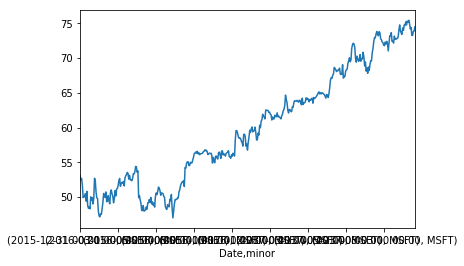

In [59]:
df.Close.plot()

In [84]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [91]:
# load the dataset
dataset = df.values
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 441 entries, (2015-12-31 00:00:00, MSFT) to (2017-09-29 00:00:00, MSFT)
Data columns (total 5 columns):
Close     441 non-null float64
High      441 non-null float64
Low       441 non-null float64
Volume    441 non-null float64
Open      441 non-null float64
dtypes: float64(5)
memory usage: 42.1+ KB


## Normalize the dataset

In [110]:
print("Before normalizing the data.\n", dataset[:3])
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print("\nAfter normalizing the data.\n", dataset[:3])

Before normalizing the data.
 [[ 0.21399179  0.26249058  0.27333322  0.15128296  0.27596556]
 [ 0.19111628  0.21066358  0.19814807  0.36267621  0.21147358]
 [ 0.19952644  0.23266209  0.24074074  0.20520747  0.23434572]]

After normalizing the data.
 [[ 0.21399179  0.26249058  0.27333322  0.15128296  0.27596556]
 [ 0.19111628  0.21066358  0.19814807  0.36267621  0.21147358]
 [ 0.19952644  0.23266209  0.24074074  0.20520747  0.23434572]]


In [93]:
# Split data into train (80%) and test (20%) dataset 
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(dataset), len(train), len(test))

441 352 89


In [68]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0:]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 4])
    return numpy.array(dataX), numpy.array(dataY)

In [69]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [70]:
trainX[:3].shape, trainY[:3].shape

((3, 1, 4), (3,))

In [71]:
trainX= trainX[:].reshape(len(trainX),4)

In [72]:
testX= testX[:].reshape(len(testX),4)

In [73]:
trainX.shape

(350, 4)

In [74]:
testX.shape

(87, 4)

In [75]:
# A quick view of the X and Y
numpy.hstack((trainX[:3], trainY[:3].reshape(3,1)))


array([[ 0.21399179,  0.26249058,  0.27333322,  0.15128296,  0.21147358],
       [ 0.19111628,  0.21066358,  0.19814807,  0.36267621,  0.23434572],
       [ 0.19952644,  0.23266209,  0.24074074,  0.20520747,  0.21147358]])

In [76]:
# reshape input to be [samples, time steps, features]
print(trainX[:3])
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX[:].shape)
print(testX[:].shape)

[[ 0.21399179  0.26249058  0.27333322  0.15128296]
 [ 0.19111628  0.21066358  0.19814807  0.36267621]
 [ 0.19952644  0.23266209  0.24074074  0.20520747]]
(350, 1, 4)
(87, 1, 4)


In [77]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 4)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2s - loss: 0.0774
Epoch 2/100
2s - loss: 0.0150
Epoch 3/100
2s - loss: 0.0039
Epoch 4/100
2s - loss: 8.7565e-04
Epoch 5/100
2s - loss: 6.3018e-04
Epoch 6/100
2s - loss: 5.9375e-04
Epoch 7/100
2s - loss: 5.5203e-04
Epoch 8/100
2s - loss: 5.1868e-04
Epoch 9/100
2s - loss: 4.9138e-04
Epoch 10/100
3s - loss: 4.6765e-04
Epoch 11/100
3s - loss: 4.6309e-04
Epoch 12/100
3s - loss: 4.3549e-04
Epoch 13/100
2s - loss: 4.4324e-04
Epoch 14/100
2s - loss: 4.2676e-04
Epoch 15/100
2s - loss: 3.9863e-04
Epoch 16/100
2s - loss: 4.3789e-04
Epoch 17/100
2s - loss: 4.2316e-04
Epoch 18/100
2s - loss: 4.2837e-04
Epoch 19/100
2s - loss: 4.3602e-04
Epoch 20/100
2s - loss: 4.1527e-04
Epoch 21/100
2s - loss: 4.2829e-04
Epoch 22/100
2s - loss: 4.2521e-04
Epoch 23/100
2s - loss: 4.2494e-04
Epoch 24/100
2s - loss: 4.2014e-04
Epoch 25/100
2s - loss: 4.2079e-04
Epoch 26/100
2s - loss: 4.2450e-04
Epoch 27/100
2s - loss: 4.0982e-04
Epoch 28/100
2s - loss: 4.2581e-04
Epoch 29/100
2s - loss: 4.1451e-04
Epoch 

## Make prediction with test data

In [78]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(testX.shape)

(87, 1, 4)


## Reshape and invert the transformation

In [114]:
# Reshape to (350,5) as this is the numpy array shape when we did the transformed earlier.
trainPredict2 = numpy.hstack((trainX[:].reshape(len(trainX),4), trainPredict[:].reshape(len(trainPredict),1)))
trainY2 = numpy.hstack((trainX[:].reshape(len(trainX),4), trainY[:].reshape(len(trainY),1)))
testPredict2  = numpy.hstack((testX[:].reshape(len(testX),4), testPredict[:].reshape(len(testPredict),1)))
testY2 = numpy.hstack((testX[:].reshape(len(testX),4), testY[:].reshape(len(testY),1)))

#print(trainPredict2.shape)
#print(trainY2.shape)
#print(testPredict2.shape)
#print(trainY2.shape)

# Transform back to original matrixs
trainPredict3 = scaler.inverse_transform(trainPredict2)
trainY3 = scaler.inverse_transform(trainY2)
testPredict3 = scaler.inverse_transform(testPredict2)
testY3 = scaler.inverse_transform(testY2)


# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY3[:,4], trainPredict3[:,4]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY3[:,4], testPredict3[:,4]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 0.02 RMSE
Test Score: 0.01 RMSE


In [80]:
testPredict3.shape

(87, 5)

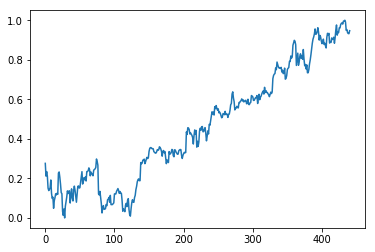

In [81]:
plt.plot(dataset[:,4])

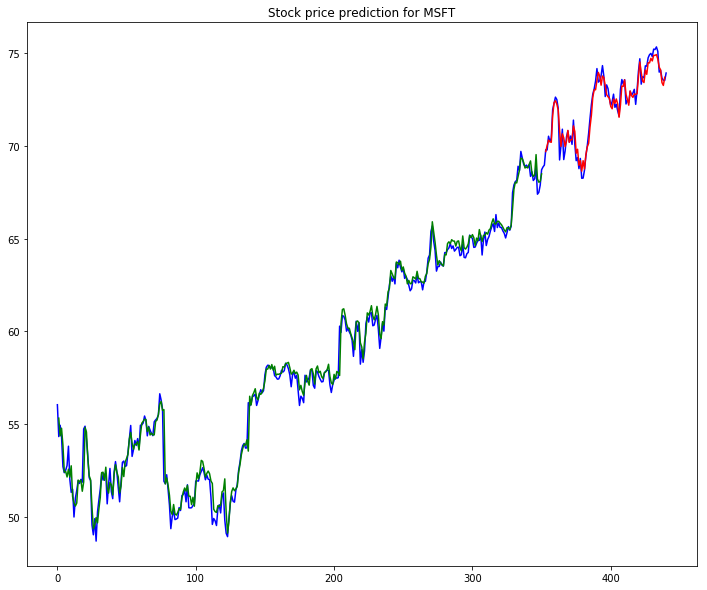

In [106]:
# shift train predictions for plotting
dataset2 = scaler.inverse_transform(dataset)
datasetplot= dataset2[:,4]
datasetplot = datasetplot.reshape(len(datasetplot),1)
#print(datasetplot.shape)
#datasetplot.reshape(len(datasetplot,1))


trainPredictPlot = numpy.empty_like(datasetplot)
trainPredictPlot[:, :] = numpy.nan
trainPredict4 = trainPredict3[:,4]
trainPredict4 = trainPredict4.reshape(len(trainPredict4),1)
#print(trainPredict4[:3])
trainPredictPlot[look_back:len(trainPredict4)+look_back, :] = trainPredict4
#print(trainPredictPlot.shape)

#print(dataset.shape)
#print(testPredict3.shape)
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(datasetplot)
testPredictPlot[:, :] = numpy.nan
testPredict4 = testPredict3[:,4]
testPredict4 = testPredict4.reshape(len(testPredict4),1)
testPredictPlot[len(trainPredict4)+(look_back*2)+1:len(dataset)-1, :] = testPredict4
# plot baseline and predictions
plt.figure(figsize=(12,10))
plt.plot(datasetplot, color='blue', label='Historic Data')
plt.plot(trainPredictPlot, color='green', label='Training Data')
plt.plot(testPredictPlot, color='red', label='Prediction Data')
plt.title('Stock price prediction for %s' %ticker)
plt.show()

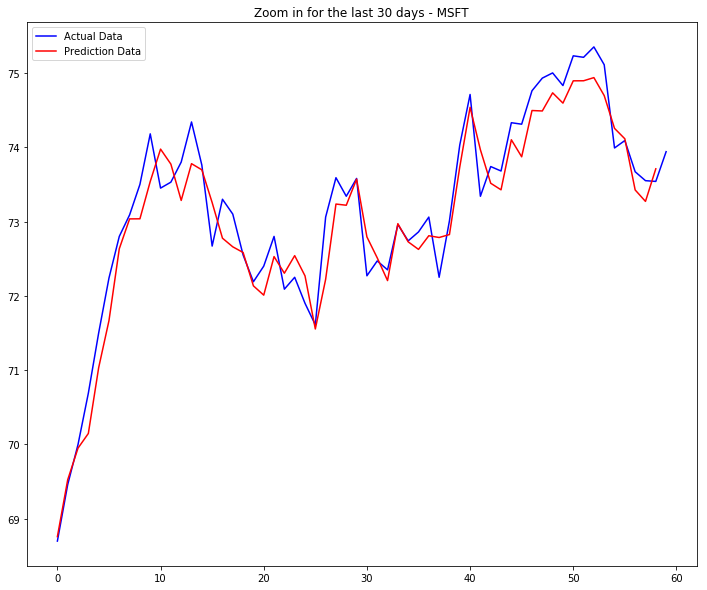

In [109]:
plt.figure(figsize=(12,10))
plt.plot(datasetplot[-60:], color='blue', label='Actual Data')
plt.plot(testPredictPlot[-60:], color='red', label='Prediction Data')
plt.title("Zoom in for the last 30 days - %s" %ticker)
plt.legend()
plt.show()